# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [28]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [29]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [30]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


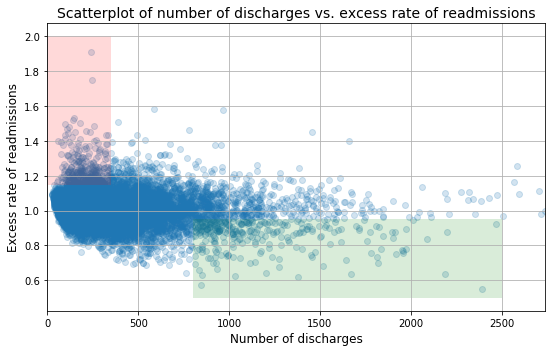

In [31]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [32]:
# Your turn

In [33]:
def correlation(x,y):
    """computing correlation between two variables"""
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

In [135]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,1.007504,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,1.007504,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,1.007504,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,1.007504,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,1.007504,NaN,NaN,NaN,07/01/2010,06/30/2013


In [85]:
clean_hospital_read_df['Excess Readmission Ratio'] = clean_hospital_read_df['Excess Readmission Ratio'].fillna(clean_hospital_read_df['Excess Readmission Ratio'].mean())

In [86]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11578 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [ ]:
#In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 
#and 63% have excess readmission rate greater than 1

#In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 
#44% have excess readmission rate greater than 1

In [87]:
lesserthan100 = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']<100]\
        ['Excess Readmission Ratio']
greaterthan100 = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']>100]\
        ['Excess Readmission Ratio']
print(lesserthan100.mean())
print(greaterthan100.mean())

1.0216535905998851
1.0057676562195774


In [92]:
lesserthan100.mean() - greaterthan100.mean()

0.01588593438030772

# #1. Hypothesis test below

In [109]:
#Testing to see if there is a statisitcal difference in the mean excess readmissions ratio between number of 
#discharges less than and greater than 100
empirical_diff_of_mean = lesserthan100.mean() - greaterthan100.mean()
perm_rep = np.empty(10000)
concat = np.concatenate((lesserthan100, greaterthan100))
for i in range(10000): 
    perm_data = np.random.permutation(concat)
    perm_sample_1 = perm_data[:len(lesserthan100)]
    perm_sample_2 = perm_data[len(lesserthan100):]
    perm_rep[i] = np.mean(perm_sample_1)-np.mean(perm_sample_2)
p = np.sum(perm_rep>=empirical_diff_of_mean)/len(perm_rep)
print(p)

0.0


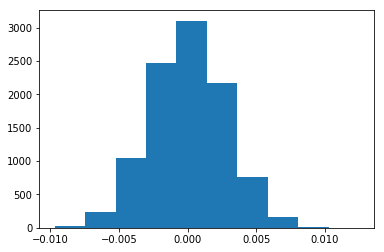

In [110]:
_ = plt.hist(perm_rep)
plt.show()

In [121]:
lesserthan1000 = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']<1000]\
        ['Excess Readmission Ratio']
greaterthan1000 = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']>1000]\
        ['Excess Readmission Ratio']
print(lesserthan1000.mean())
print(greaterthan1000.mean())

1.0087215859700551
0.9783354211663071


In [128]:
empirical_diff_of_mean2 = lesserthan1000.mean() - greaterthan1000.mean()
perm_rep2 = np.empty(10000)
concat2 = np.concatenate((lesserthan1000, greaterthan1000))
for i in range(10000): 
    perm_data2 = np.random.permutation(concat2)
    perm_sample_1 = perm_data2[:len(lesserthan1000)]
    perm_sample_2 = perm_data2[len(lesserthan1000):]
    perm_rep2[i] = np.mean(perm_sample_1)-np.mean(perm_sample_2)
p = np.sum(perm_rep2>=empirical_diff_of_mean)/len(perm_rep2)
print(p)

0.0002


# #2. Above are P values for the difference in means for number of discharges above and below 100 and 1000, which are 0.00 and 0.0002, respectively. 

# #3 At alpha = 0.01, there is statistical differences.

(array([  12.,   97.,  495., 1605., 2858., 2814., 1514.,  519.,   78.,
           8.]),
 array([-1.71250098e-02, -1.36951831e-02, -1.02653563e-02, -6.83552952e-03,
        -3.40570275e-03,  2.41240270e-05,  3.45395080e-03,  6.88377758e-03,
         1.03136044e-02,  1.37434311e-02,  1.71732579e-02]),
 <a list of 10 Patch objects>)

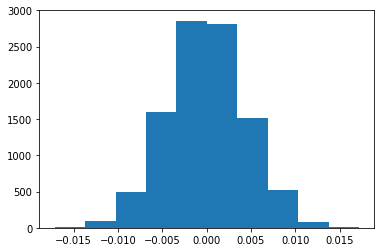

In [129]:
plt.hist(perm_rep2)

In [127]:
empirical_diff_of_mean2

0.030386164803748006

In [132]:
def correlation(x,y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

In [134]:
correlation(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio'])

-0.09692403131735897

In [139]:
print(clean_hospital_read_df['Excess Readmission Ratio'].min())
print(clean_hospital_read_df['Excess Readmission Ratio'].max())

0.5495
1.9095


# #4. Statistical significance is given by the hypothesis tests. It takes the null, plots a histogram assuming the null, and takes into account the probabilty of the observed taking place under the assumed null hypothesis. If the probabilty is small, it is said to be statistically significant. Where as practical significance is in the effects that the observed relationships have on the data. If the effect is relatively small, it is said not to have much practical significance. If there is a small practical significance it may be regarded are useless regardless if it is statistically significant. 

# I consider the indirect correlation between excess readmissions and number of discharge as being practically significant, but the practical differences in means of excess readmissions between number of discharges above and below 100 and 1000, repectively are minimal. For above and below 1000, the difference in means is 0.03, while for above and below 100 os 0.015. This very small practical significance would lead me to disregard the initial report's emphasis on this. And for this reason, I disagree with the report (answer to A.)

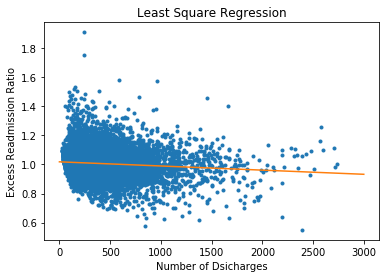

In [166]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
_ = plt.plot(x,y, marker='.',linestyle='None')
_ = plt.title('Least Square Regression')
_ = plt.xlabel('Number of Dsicharges')
_ = plt.ylabel('Excess Readmission Ratio')
a,b = np.polyfit(x, y, 1)
x = np.array([0,3000])
y = a*x+b
_ = plt.plot(x,y)
plt.show()


# #5. An advantage of the scatter plot is that you can get a decent sense of where the data points may center towards. A disadvantage is that it can be difficult to make out a relationship. For that I plotted least square regression to accompany the scatter plot. 